In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
data = pd.read_csv('datasets/diamonds.csv', index_col=0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 10)

In [5]:
# we will work with only 20% of the data
data = data.sample(frac=0.2)

In [6]:
data.shape

(10788, 10)

In [7]:
data.reset_index(inplace = True, drop=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.05,Ideal,F,IF,61.7,56.0,13060,6.48,6.56,4.02
1,1.50,Very Good,G,SI1,62.2,58.0,9515,7.21,7.28,4.51
2,0.36,Ideal,G,VVS1,62.1,56.0,945,4.60,4.58,2.85
3,0.32,Ideal,G,IF,61.4,55.0,918,4.42,4.44,2.72
4,0.30,Ideal,H,VS2,62.5,53.2,486,4.29,4.34,2.69


In [8]:
correlation = data.corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.014971,0.197759,0.925351,0.976356,0.975155,0.968894
depth,0.014971,1.000000,-0.313904,-0.015024,-0.036803,-0.040364,0.087655
table,0.197759,-0.313904,1.000000,0.140648,0.213241,0.206625,0.168743
price,0.925351,-0.015024,0.140648,1.000000,0.886246,0.887491,0.877415
x,0.976356,-0.036803,0.213241,0.886246,1.000000,0.998515,0.985666
y,0.975155,-0.040364,0.206625,0.887491,0.998515,1.000000,0.985424
z,0.968894,0.087655,0.168743,0.877415,0.985666,0.985424,1.000000


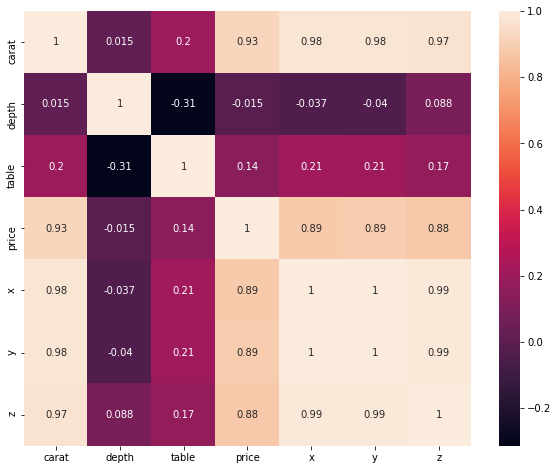

In [9]:
plt.subplots(figsize=(10,8))
sns.heatmap(correlation, annot=True)

plt.show()

In [10]:
data['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [11]:
data['color'].unique()

array(['F', 'G', 'H', 'E', 'D', 'I', 'J'], dtype=object)

In [12]:
data['clarity'].unique()

array(['IF', 'SI1', 'VVS1', 'VS2', 'VS1', 'SI2', 'VVS2', 'I1'],
      dtype=object)

C:\Users\NEHA\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


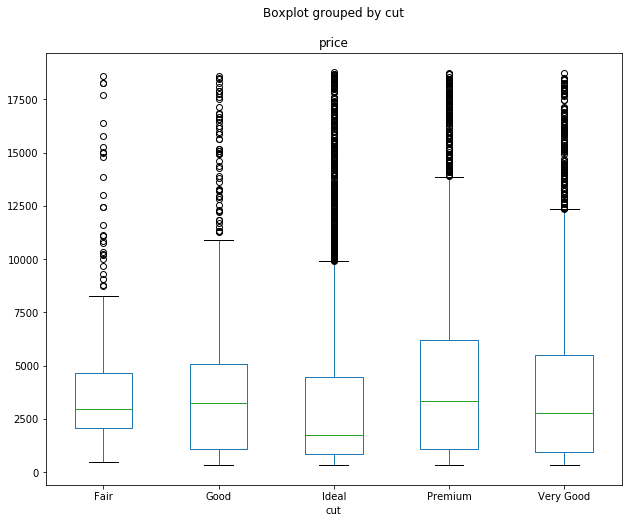

In [13]:
 data.boxplot(by='cut', column=['price'], grid = False, figsize=(10,8))
    

C:\Users\NEHA\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


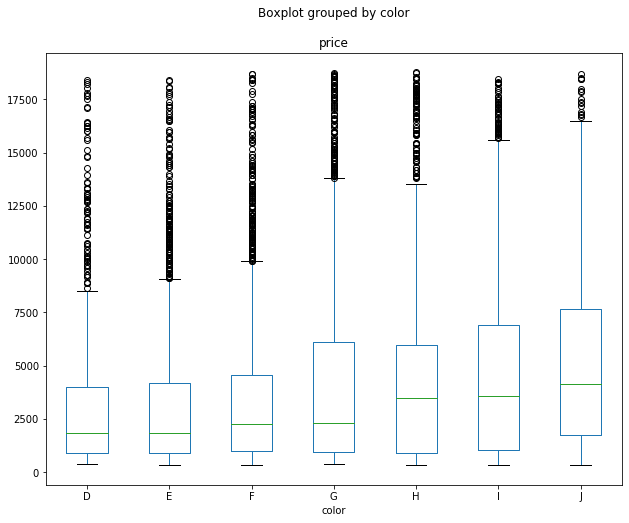

In [14]:
data.boxplot(by='color', column=['price'], grid = False, figsize=(10,8))

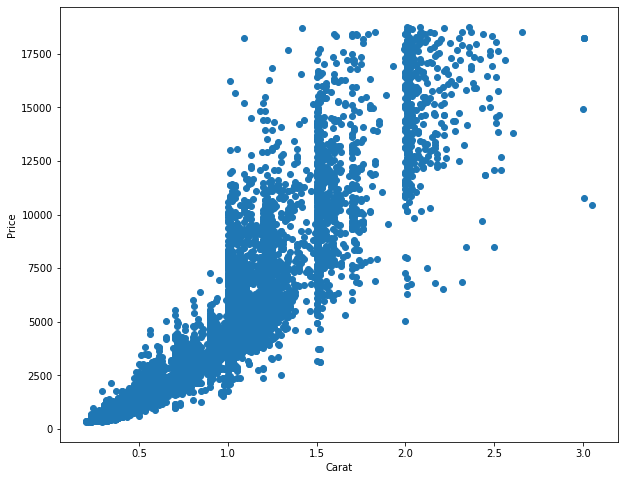

In [15]:
plt.subplots(figsize=(10,8))

plt.scatter(data['carat'], data['price'])

plt.xlabel('Carat')
plt.ylabel('Price')

plt.show()

In [16]:
clarity_dict = {"IF":7,"VVS1":6,"VVS2":5,"VS1":4,"VS2":3,"SI1":2,"SI2":1,"I1":0}

data['clarity'].replace(clarity_dict, inplace=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.05,Ideal,F,7,61.7,56.0,13060,6.48,6.56,4.02
1,1.50,Very Good,G,2,62.2,58.0,9515,7.21,7.28,4.51
2,0.36,Ideal,G,6,62.1,56.0,945,4.60,4.58,2.85
3,0.32,Ideal,G,7,61.4,55.0,918,4.42,4.44,2.72
4,0.30,Ideal,H,3,62.5,53.2,486,4.29,4.34,2.69


In [27]:
data = pd.get_dummies(data, columns=['cut', 'color'])

data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.05,7,61.7,56.0,13060,6.48,6.56,4.02,0,0,1,0,0,0,0,1,0,0,0,0
1,1.50,2,62.2,58.0,9515,7.21,7.28,4.51,0,0,0,0,1,0,0,0,1,0,0,0
2,0.36,6,62.1,56.0,945,4.60,4.58,2.85,0,0,1,0,0,0,0,0,1,0,0,0
3,0.32,7,61.4,55.0,918,4.42,4.44,2.72,0,0,1,0,0,0,0,0,1,0,0,0
4,0.30,3,62.5,53.2,486,4.29,4.34,2.69,0,0,1,0,0,0,0,0,0,1,0,0


In [28]:
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']

numeric_df = data[NUMERIC_FEATURES]

numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.795438,61.715091,57.468307,5.728478,5.730423,3.534190
std,0.468370,1.442441,2.260976,1.117051,1.108536,0.690265
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.700000,5.715000,3.530000
75%,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000
max,3.050000,70.600000,79.000000,9.540000,9.380000,5.900000


In [29]:
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)

numeric_array[:5]

array([[ 0.54353095, -0.0104625 , -0.6494432 ,  0.67280418,  0.74838841,
         0.70383553],
       [ 1.50435527,  0.33618818,  0.23517157,  1.32634062,  1.3979236 ,
         1.41374124],
       [-0.929733  ,  0.26685804, -0.6494432 , -1.01027597, -1.03783337,
        -0.99124546],
       [-1.01513961, -0.21845291, -1.09175059, -1.17142194, -1.16413188,
        -1.17958779],
       [-1.05784291,  0.54417858, -1.88790389, -1.28780514, -1.2543451 ,
        -1.22305141]])

In [30]:
numeric_df = pd.DataFrame(numeric_array, columns = numeric_df.columns)

numeric_df.describe()

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,3.891132e-16,3.783177e-15,-4.359591e-16,7.161494e-16,-5.196684e-16,-3.635291e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.271359e+00,-1.297520e+01,-6.399439e+00,-5.128451e+00,-5.169599e+00,-5.120289e+00
25%,-8.443264e-01,-4.957734e-01,-6.494432e-01,-9.117979e-01,-9.115349e-01,-9.043182e-01
50%,-2.037769e-01,5.886763e-02,-2.071358e-01,-2.549503e-02,-1.391331e-02,-6.070187e-03
75%,5.221793e-01,5.441786e-01,6.774790e-01,7.175670e-01,7.213244e-01,7.183234e-01
max,4.813861e+00,6.159920e+00,9.523627e+00,3.412286e+00,3.292401e+00,3.427555e+00


In [31]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.05,7,61.7,56.0,13060,6.48,6.56,4.02,0,0,1,0,0,0,0,1,0,0,0,0
1,1.50,2,62.2,58.0,9515,7.21,7.28,4.51,0,0,0,0,1,0,0,0,1,0,0,0
2,0.36,6,62.1,56.0,945,4.60,4.58,2.85,0,0,1,0,0,0,0,0,1,0,0,0
3,0.32,7,61.4,55.0,918,4.42,4.44,2.72,0,0,1,0,0,0,0,0,1,0,0,0
4,0.30,3,62.5,53.2,486,4.29,4.34,2.69,0,0,1,0,0,0,0,0,0,1,0,0


In [32]:
data.drop(NUMERIC_FEATURES, inplace =True, axis = 1)

data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,7,13060,0,0,1,0,0,0,0,1,0,0,0,0
1,2,9515,0,0,0,0,1,0,0,0,1,0,0,0
2,6,945,0,0,1,0,0,0,0,0,1,0,0,0
3,7,918,0,0,1,0,0,0,0,0,1,0,0,0
4,3,486,0,0,1,0,0,0,0,0,0,1,0,0


In [33]:
data = pd.concat([data, numeric_df], axis = 1)

data.shape

(10788, 20)

In [34]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,7,13060,0,0,1,0,0,0,0,1,0,0,0,0,0.543531,-0.010463,-0.649443,0.672804,0.748388,0.703836
1,2,9515,0,0,0,0,1,0,0,0,1,0,0,0,1.504355,0.336188,0.235172,1.326341,1.397924,1.413741
2,6,945,0,0,1,0,0,0,0,0,1,0,0,0,-0.929733,0.266858,-0.649443,-1.010276,-1.037833,-0.991245
3,7,918,0,0,1,0,0,0,0,0,1,0,0,0,-1.015140,-0.218453,-1.091751,-1.171422,-1.164132,-1.179588
4,3,486,0,0,1,0,0,0,0,0,0,1,0,0,-1.057843,0.544179,-1.887904,-1.287805,-1.254345,-1.223051


In [35]:
data.to_csv('datasets/diamonds_processed.csv', index = False)

In [36]:
from sklearn.model_selection import train_test_split

x = data.drop('price', axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [38]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = linear_regression.predict(x_test)

In [40]:
train_score = linear_regression.score(x_train, y_train)
print('Testing Score: ', train_score)

Testing Score:  0.9157516136830322


In [41]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

print('Testing Score: ', score)

Testing Score:  0.9209435672168247
